In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("games.csv", index_col='id')

In [3]:
df.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
id,,,,,,,,,,,,,,,
TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


### HYPOTHESIS 1: The players with white piecies have an advantage as they start the game

In [4]:
def perc_viz(data, column):
    viz_data_1 = df.groupby(['winner']).count().iloc[:,0]
    viz_data_1 = round(viz_data_1/sum(viz_data_1)*100, 2)

    fig, ax = plt.subplots()
    fig.set_size_inches(15,7)
    fig.suptitle('Percentage of winners', fontsize = 25)
    fig.set_facecolor('lightgrey')
    ax.set_facecolor('lightgrey')
    ax.get_yaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', which='major', labelsize=25)
    plot = ax.bar(viz_data_1.index, viz_data_1, color = ['black', 'grey', 'white'])
    text_colors = ['white', 'black', 'black']
    i = 0
    for rect in plot:
        ax.text(rect.get_x() + rect.get_width()/2.7, rect.get_height()/2.7, str(rect.get_height()) + "%",
                    fontsize=25, color = text_colors[i])
        i += 1;

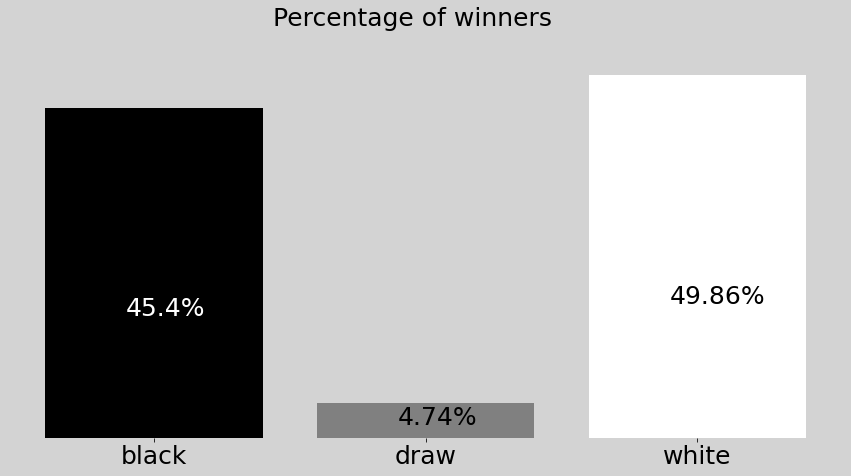

In [5]:
perc_viz(df, 'winner')

#### As we can see the difference is not quite significant. So we can't claim that players with white piecies have advantage. But if you can play with white pieces :)

### HYPOTHESIS 2: The length of the game affects the result.

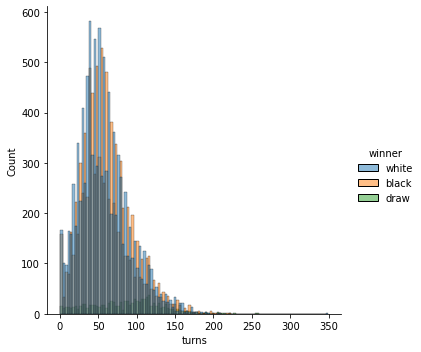

In [6]:
sns.displot(df, x="turns", hue="winner");

#### As we can see, according to our dataset, if the moves are more than approximately 80, most likely the result of the game will be draw.

### HYPOTHESIS 3: Which openings are the best

In [7]:
# Picking only the openings that are used more than 99 times.
openings = pd.value_counts(df['opening_name'])
mask = openings >= 100
openings = openings.index[mask]
openings

Index(['Van't Kruijs Opening', 'Sicilian Defense',
       'Sicilian Defense: Bowdler Attack', 'French Defense: Knight Variation',
       'Scotch Game', 'Scandinavian Defense: Mieses-Kotroc Variation',
       'Queen's Pawn Game: Mason Attack',
       'Queen's Pawn Game: Chigorin Variation', 'Scandinavian Defense',
       'Horwitz Defense', 'Caro-Kann Defense', 'Philidor Defense #3',
       'Philidor Defense #2', 'Indian Game',
       'Italian Game: Anti-Fried Liver Defense',
       'Four Knights Game: Italian Variation', 'Modern Defense',
       'Owen Defense', 'King's Pawn Game: Wayward Queen Attack',
       'Sicilian Defense: Old Sicilian',
       'King's Pawn Game: Leonardis Variation', 'Queen's Pawn Game',
       'Philidor Defense', 'Ruy Lopez: Steinitz Defense', 'Hungarian Opening',
       'Queen's Pawn', 'French Defense: Normal Variation', 'Bishop's Opening',
       'Queen's Gambit Refused: Marshall Defense', 'Queen's Pawn Game #2',
       'Queen's Gambit Declined', 'Queen's Pawn 

If there is the word 'defense' in the opening name, it's a tactic that the player who uses black pieces choosed.
So we will consider black openings, if there is the word 'defense' in the opening name and white openings otherwise.

In [8]:
black_openings = []
white_openings = []
for op in openings:
    if "defense" in op.lower():
        black_openings.append(op)
    else:
        white_openings.append(op)

In [9]:
black_openings

['Sicilian Defense',
 'Sicilian Defense: Bowdler Attack',
 'French Defense: Knight Variation',
 'Scandinavian Defense: Mieses-Kotroc Variation',
 'Scandinavian Defense',
 'Horwitz Defense',
 'Caro-Kann Defense',
 'Philidor Defense #3',
 'Philidor Defense #2',
 'Italian Game: Anti-Fried Liver Defense',
 'Modern Defense',
 'Owen Defense',
 'Sicilian Defense: Old Sicilian',
 'Philidor Defense',
 'Ruy Lopez: Steinitz Defense',
 'French Defense: Normal Variation',
 "Queen's Gambit Refused: Marshall Defense",
 'French Defense: Exchange Variation',
 'Sicilian Defense: Smith-Morra Gambit #2',
 'Pirc Defense #4',
 'French Defense #2',
 "King's Pawn Game: McConnell Defense"]

In [10]:
# Df for black openings.
black_openings_df = pd.DataFrame()
for op in black_openings:
    black_openings_df = pd.concat([black_openings_df, df[(df['opening_name'] == op) & (df['winner'] == 'black')]])

In [11]:
# Df for white openings.
white_openings_df = pd.DataFrame()
for op in white_openings:
    white_openings_df = pd.concat([white_openings_df, df[(df['opening_name'] == op) & (df['winner'] == 'white')]])

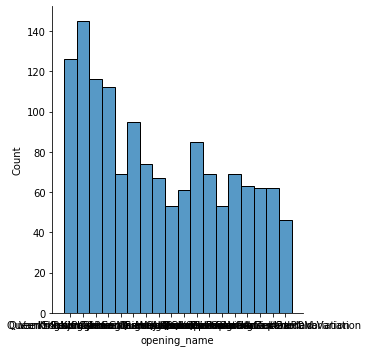

In [12]:
sns.displot(white_openings_df, x="opening_name");

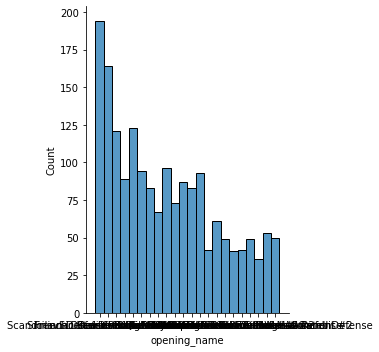

In [13]:
sns.displot(black_openings_df, x="opening_name");

### In my opinion there is no point to use visualization skills to solve this task (see the horrible plots above).

###### Best opening for black

In [14]:
black_openings_df.value_counts('opening_name').index[0]

'Sicilian Defense'

###### Best opening for white

In [15]:
white_openings_df.value_counts('opening_name').index[0]

'Scotch Game'

### HYPOTHESIS 4: If players' ratings are close to each other, the game will last longer.

In [16]:
# Filtering games where players' rating difference is less than 100.
equal_players_df = df[np.abs(df['white_rating']-df['black_rating']) < 100]
non_equal_players_df = df[np.abs(df['white_rating']-df['black_rating']) >= 100]

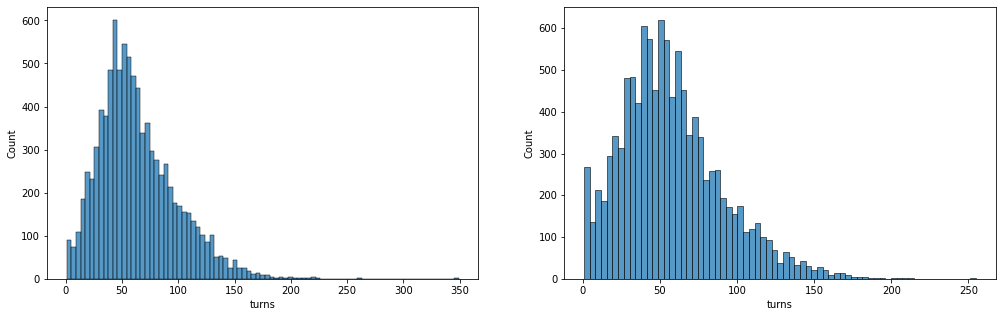

In [17]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(17,5)
sns.histplot(equal_players_df, x = 'turns', ax = ax[0])
sns.histplot(non_equal_players_df, x = 'turns', ax = ax[1]);

##### As we can see there is no significance differance.

I don't like chess that much, so i couldn't generate more good tasks to solve.